In [2]:
# import libraries
%matplotlib inline
import pandas as pd
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [3]:
# Download MNIST datasets 
# This datasets include 2 tapples. x_train, x_test(28,28) and y_train, y_test(9 classes).
(x_train, y_train), (x_test, y_test) = mnist.load_data()# show sample data

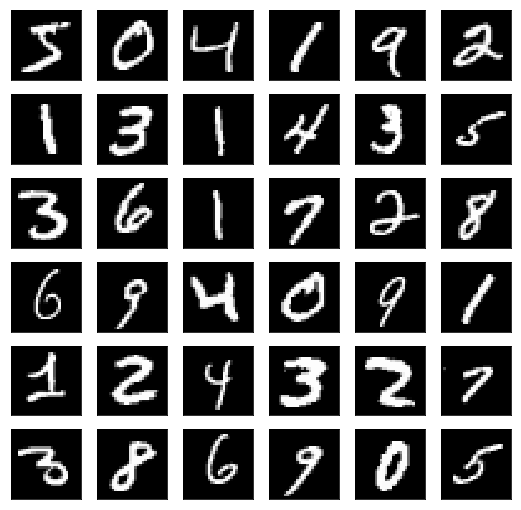

In [4]:
# show sample data
fig = plt.figure(figsize=(9,9))

for i in range(36):
    ax = fig.add_subplot(6, 6, i+1, xticks=[], yticks=[])
    ax.imshow(x_train[i], cmap='gist_gray')

In [5]:
# reshape 28*28 pixel data into 784 dim data
# convert into float type and normalize pixel data from 0.0 to 1.0
x_train = x_train.reshape(60000, 784).astype('float32') /255
x_test = x_test.reshape(10000, 784).astype('float32') /255

# encode label data into "one-hot" 
y_train = keras.utils.np_utils.to_categorical(y_train.astype('int32'),10)
y_test = keras.utils.np_utils.to_categorical(y_test.astype('int32'),10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 23s 376us/step - loss: 0.9565 - acc: 0.7672 - val_loss: 0.5198 - val_acc: 0.8650
Epoch 2/4
60000/60000 [==============================] - 23s 391us/step - loss: 0.8627 - acc: 0.8343 - val_loss: 0.7700 - val_acc: 0.8860
Epoch 3/4
60000/60000 [==============================] - 25s 417us/step - loss: 1.8921 - acc: 0.8241 - val_loss: 1.2307 - val_acc: 0.9013
Epoch 4/4
60000/60000 [==============================] - 28s 473us/step - loss: 2.8980 - acc: 0.7969 - val_loss: 3.3590 - val_acc: 0.7776


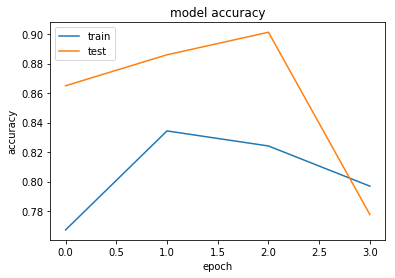

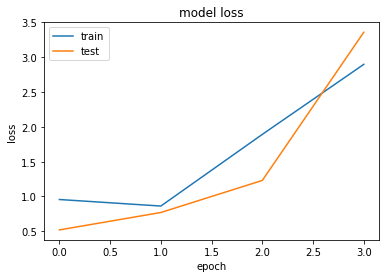

In [6]:
# Sequential Model

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import RMSprop


# select Sequiential model
model = Sequential()

# 1st layer : fully connected layer(output:512)
# acrivation methods: ReLU(rectified linear unit)
# only first layer needs to be define input_shape
model.add(Dense(512, activation='relu', input_shape=(784,)))

# use Dropout regularization rate to avoid overfitting
# Randomly ignoring connections between layers 
model.add(Dropout(0.2))

# 2st layer : fully connected layer(output:512)
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

# 3st layer : fully connected layer(output:10)
# acrivation methods: softmax, which squashes the outputs of each unit to be between 0 and 1.(often used in the final layer)
model.add(Dense(10, activation='softmax'))

# Set definitions for traning
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

# Excute training for 20(epochs) times
history = model.fit(x_train, y_train, batch_size=128, epochs=4, verbose=1, validation_data=(x_test, y_test))

# plot the resulut
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# plot the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Functional API

import matplotlib.pyplot as plt
from keras.engine import Model
from keras.layers import Input, Dense, Dropout
from keras.optimizers import RMSprop

# from MnistData import reshapeDataToOneDimension

inputs = Input(shape=(784,))

nw = Dense(512, activation='relu')(inputs)
nw = Dropout(.2)(nw)
nw = Dense(512, activation='relu')(nw)
nw = Dropout(.2)(nw)
predictions = Dense(10, activation='softmax')(nw)

model = Model(inputs=inputs, outputs=predictions)
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

# (x_train, y_train), (x_test, y_test) = reshapeDataToOneDimension()
history = model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 22s 366us/step - loss: 0.8710 - acc: 0.7761 - val_loss: 0.6120 - val_acc: 0.8398
Epoch 2/20
60000/60000 [==============================] - 22s 372us/step - loss: 0.7323 - acc: 0.8430 - val_loss: 0.6849 - val_acc: 0.8748
Epoch 3/20
60000/60000 [==============================] - 24s 396us/step - loss: 1.5157 - acc: 0.8362 - val_loss: 0.9668 - val_acc: 0.9138
Epoch 4/20
60000/60000 [==============================] - 27s 456us/step - loss: 2.5592 - acc: 0.8110 - val_loss: 1.5996 - val_acc: 0.8869
Epoch 5/20
46848/60000 [======================>.......] - ETA: 6s - loss: 3.1362 - acc: 0.7891